# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_FacebookLite_1.csv")
df.head()

,userName,score,at,content
0,Nandar Chikal 82,4,2024-06-09 18:09:46,Bagus
1,Ngatenang Bae,3,2024-06-09 13:43:26,Susah hapus akun yang gak di pakai lagi
2,imam Safi'i,1,2024-06-07 19:20:20,Cuma gara gara nomor yang lama hilang saya jad...
3,Mohsoleh Mangoleh,4,2024-06-05 05:37:09,Terima kasih sahabat ku
4,ris ya,5,2024-06-02 09:38:41,Bagus


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Bagus,Nandar Chikal 82,2024-06-09 18:09:46
1,Susah hapus akun yang gak di pakai lagi,Ngatenang Bae,2024-06-09 13:43:26
2,Cuma gara gara nomor yang lama hilang saya jad...,imam Safi'i,2024-06-07 19:20:20
3,Terima kasih sahabat ku,Mohsoleh Mangoleh,2024-06-05 05:37:09
4,Bagus,ris ya,2024-06-02 09:38:41
...,...,...,...
995,baik,Hendra saripi Farhan,2024-05-25 01:58:30
996,bgus,Dinalia Dinalia,2024-05-25 01:56:06
997,"Apknya bagus, tpi bisa di upgrade lgi ga min, ...",Ardi Arbowo,2024-05-25 01:42:21
998,Bagus,kertas Koran,2024-05-25 01:35:32


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   1000 non-null   object
 1   userName  1000 non-null   object
 2   at        1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,1000,1000,1000
unique,716,997,998
top,mantap,Heri Susanto,2024-05-27 09:46:45
freq,32,2,2


# **Cleaning Data**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(1000, 3)

In [8]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong
df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
df.shape

(716, 3)

In [13]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,bagus,Nandar Chikal 82,2024-06-09 18:09:46
1,susah hapus akun yang gak di pakai lagi,Ngatenang Bae,2024-06-09 13:43:26
2,cuma gara gara nomor yang lama hilang saya jad...,imam Safi'i,2024-06-07 19:20:20
3,terima kasih sahabat ku,Mohsoleh Mangoleh,2024-06-05 05:37:09
5,di facebok ini tu enak banget bisa belanja dan...,sabrina ramadina,2024-06-01 06:47:18
...,...,...,...
990,kenapa aplikasinya ngga bosa mode gratis,Desto Putra,2024-05-25 02:08:32
992,sangat good,Achuy Keyboardis,2024-05-25 02:06:11
994,baguuuss,Fela Afrianti97,2024-05-25 02:00:56
997,apknya bagus tpi bisa di upgrade lgi ga min bi...,Ardi Arbowo,2024-05-25 01:42:21


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,bagus,Nandar Chikal 82,2024-06-09 18:09:46
1,susah hapus akun yang tidak di pakai lagi,Ngatenang Bae,2024-06-09 13:43:26
2,cuma gara gara nomor yang lama hilang saya jad...,imam Safi'i,2024-06-07 19:20:20
3,terima kasih sahabat ku,Mohsoleh Mangoleh,2024-06-05 05:37:09
5,di facebok ini tu enak banget bisa belanja dan...,sabrina ramadina,2024-06-01 06:47:18
...,...,...,...
990,kenapa aplikasinya ngga bosa mode gratis,Desto Putra,2024-05-25 02:08:32
992,sangat good,Achuy Keyboardis,2024-05-25 02:06:11
994,baguuuss,Fela Afrianti97,2024-05-25 02:00:56
997,aplikasinya bagus tpi bisa di upgrade lgi ga m...,Ardi Arbowo,2024-05-25 01:42:21


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,bagus,Nandar Chikal 82,2024-06-09 18:09:46
1,susah hapus akun tidak pakai,Ngatenang Bae,2024-06-09 13:43:26
2,cuma gara gara nomor lama hilang jadi bisa log...,imam Safi'i,2024-06-07 19:20:20
3,terima kasih sahabat ku,Mohsoleh Mangoleh,2024-06-05 05:37:09
5,facebok tu enak banget belanja ada video,sabrina ramadina,2024-06-01 06:47:18
...,...,...,...
990,aplikasinya ngga bosa mode gratis,Desto Putra,2024-05-25 02:08:32
992,sangat good,Achuy Keyboardis,2024-05-25 02:06:11
994,baguuuss,Fela Afrianti97,2024-05-25 02:00:56
997,aplikasinya bagus tpi di upgrade lgi ga min bi...,Ardi Arbowo,2024-05-25 01:42:21


In [19]:
# 3. Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                                [bagus]
1                     [susah, hapus, akun, tidak, pakai]
2      [cuma, gara, gara, nomor, lama, hilang, jadi, ...
3                           [terima, kasih, sahabat, ku]
5       [facebok, tu, enak, banget, belanja, ada, video]
                             ...                        
990              [aplikasinya, ngga, bosa, mode, gratis]
992                                       [sangat, good]
994                                           [baguuuss]
997    [aplikasinya, bagus, tpi, di, upgrade, lgi, ga...
999                          [sangat, bermanfat, sekali]
Name: content, Length: 716, dtype: object

In [21]:
# # 4. Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_FacebookLite_1.csv', index = False)


In [22]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_FacebookLite_1.csv', encoding = 'latin1')
df_clean

,content
0,bagus
1,susah hapus akun tidak pakai
2,cuma gara gara nomor lama hilang jadi bisa log...
3,terima kasih sahabat ku
4,facebok tu enak banget belanja ada video
...,...
711,aplikasi ngga bosa mode gratis
712,sangat good
713,baguuuss
714,aplikasi bagus tpi di upgrade lgi ga min biar ...


# **Translate**

In [23]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [24]:
# import pandas as pd
# from easynmt import EasyNMT

In [25]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_FacebookLite_1.csv', encoding='latin1')

In [26]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [27]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [28]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [29]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_FacebookLite_1.csv')

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_FacebookLite_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,bagus,Good.
1,1,susah hapus akun tidak pakai,hardly remove unused account
2,2,cuma gara gara nomor lama hilang jadi bisa log...,"Just because an old number is missing, so log ..."
3,3,terima kasih sahabat ku,"Thank you, my friend."
4,4,facebok tu enak banget belanja ada video,"fontcolor="" # FFFF00""facebokwas so good fontco..."
...,...,...,...
711,711,aplikasi ngga bosa mode gratis,free mode unbored application
712,712,sangat good,Very good.
713,713,baguuuss,"Oh, my God."
714,714,aplikasi bagus tpi di upgrade lgi ga min biar ...,good application but upgrade igi ga min let vi...


# **Labeling**

In [31]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_FacebookLite_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,bagus,Good.
1,1,susah hapus akun tidak pakai,hardly remove unused account
2,2,cuma gara gara nomor lama hilang jadi bisa log...,"Just because an old number is missing, so log ..."
3,3,terima kasih sahabat ku,"Thank you, my friend."
4,4,facebok tu enak banget belanja ada video,"fontcolor="" # FFFF00""facebokwas so good fontco..."
...,...,...,...
711,711,aplikasi ngga bosa mode gratis,free mode unbored application
712,712,sangat good,Very good.
713,713,baguuuss,"Oh, my God."
714,714,aplikasi bagus tpi di upgrade lgi ga min biar ...,good application but upgrade igi ga min let vi...


In [32]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [33]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 341
Netral = 316
Negatif = 59

Total Data Seluruhnya : 716


In [35]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,bagus,Good.,Positif
1,1,susah hapus akun tidak pakai,hardly remove unused account,Negatif
2,2,cuma gara gara nomor lama hilang jadi bisa log...,"Just because an old number is missing, so log ...",Negatif
3,3,terima kasih sahabat ku,"Thank you, my friend.",Netral
4,4,facebok tu enak banget belanja ada video,"fontcolor="" # FFFF00""facebokwas so good fontco...",Positif
...,...,...,...,...
711,711,aplikasi ngga bosa mode gratis,free mode unbored application,Positif
712,712,sangat good,Very good.,Positif
713,713,baguuuss,"Oh, my God.",Netral
714,714,aplikasi bagus tpi di upgrade lgi ga min biar ...,good application but upgrade igi ga min let vi...,Positif


In [36]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,bagus,Good.,Positif
1,susah hapus akun tidak pakai,hardly remove unused account,Negatif
2,cuma gara gara nomor lama hilang jadi bisa log...,"Just because an old number is missing, so log ...",Negatif
3,terima kasih sahabat ku,"Thank you, my friend.",Netral
4,facebok tu enak banget belanja ada video,"fontcolor="" # FFFF00""facebokwas so good fontco...",Positif
...,...,...,...
711,aplikasi ngga bosa mode gratis,free mode unbored application,Positif
712,sangat good,Very good.,Positif
713,baguuuss,"Oh, my God.",Netral
714,aplikasi bagus tpi di upgrade lgi ga min biar ...,good application but upgrade igi ga min let vi...,Positif


# **Visualisasi**


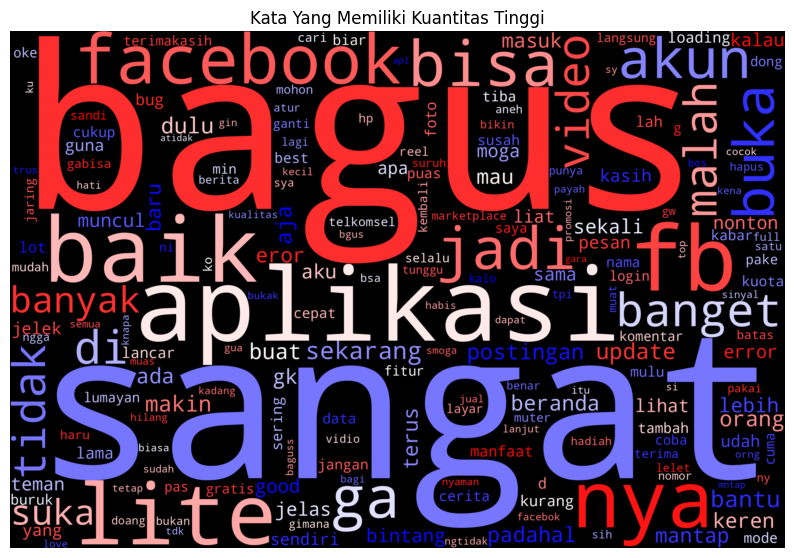

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


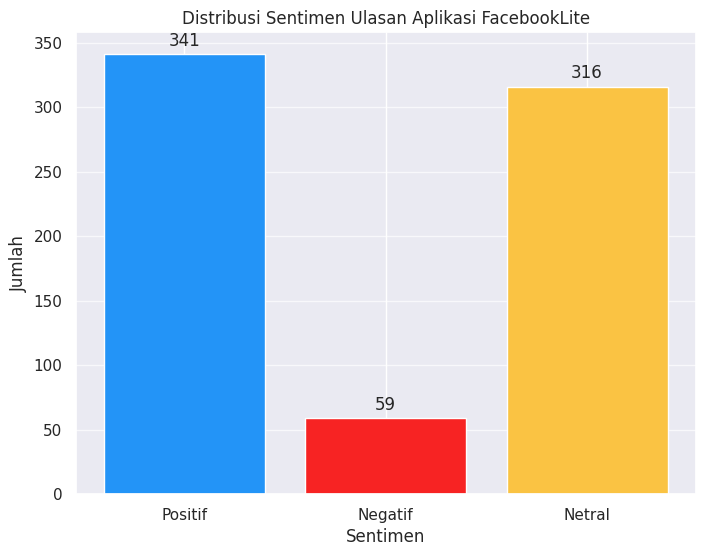

In [41]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi FacebookLite")


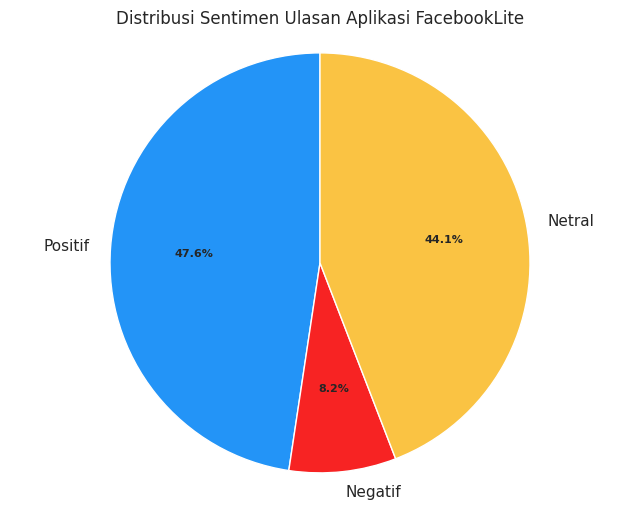

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi FacebookLite")

In [43]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,bagus,Good.,Positif
1,susah hapus akun tidak pakai,hardly remove unused account,Negatif
2,cuma gara gara nomor lama hilang jadi bisa log...,"Just because an old number is missing, so log ...",Negatif
4,facebok tu enak banget belanja ada video,"fontcolor="" # FFFF00""facebokwas so good fontco...",Positif
6,very good,very good,Positif
...,...,...,...
707,sangat sedih,So sad.,Negatif
708,gbisa buka pesan udah lbih gari aneh banget,Can't open messages already. It's weird.,Negatif
711,aplikasi ngga bosa mode gratis,free mode unbored application,Positif
712,sangat good,Very good.,Positif


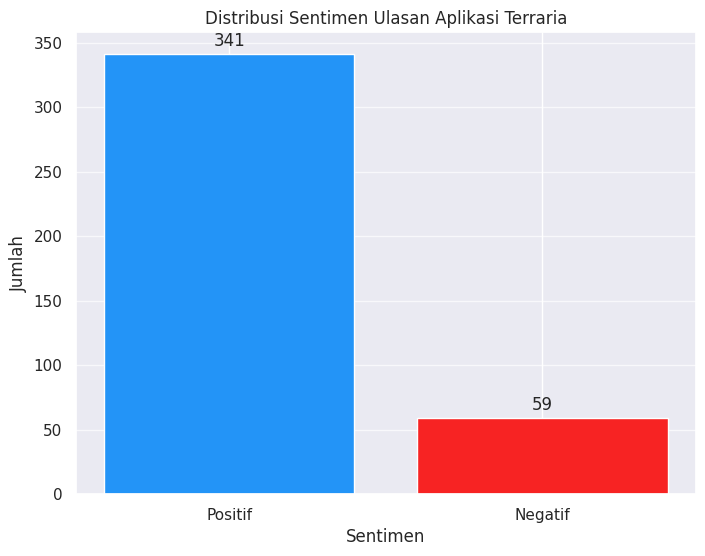

In [44]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Terraria")


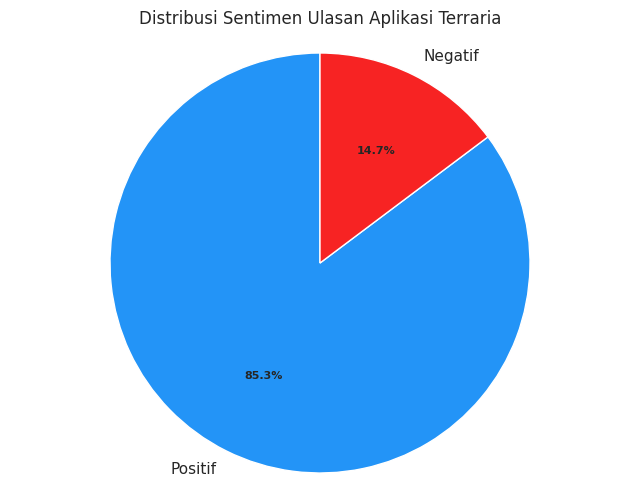

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Terraria")

In [46]:
data = data.replace({'Positif':0, 'Negatif':1})
data

,content,content_en,sentimen
0,bagus,Good.,0
1,susah hapus akun tidak pakai,hardly remove unused account,1
2,cuma gara gara nomor lama hilang jadi bisa log...,"Just because an old number is missing, so log ...",1
4,facebok tu enak banget belanja ada video,"fontcolor="" # FFFF00""facebokwas so good fontco...",0
6,very good,very good,0
...,...,...,...
707,sangat sedih,So sad.,1
708,gbisa buka pesan udah lbih gari aneh banget,Can't open messages already. It's weird.,1
711,aplikasi ngga bosa mode gratis,free mode unbored application,0
712,sangat good,Very good.,0


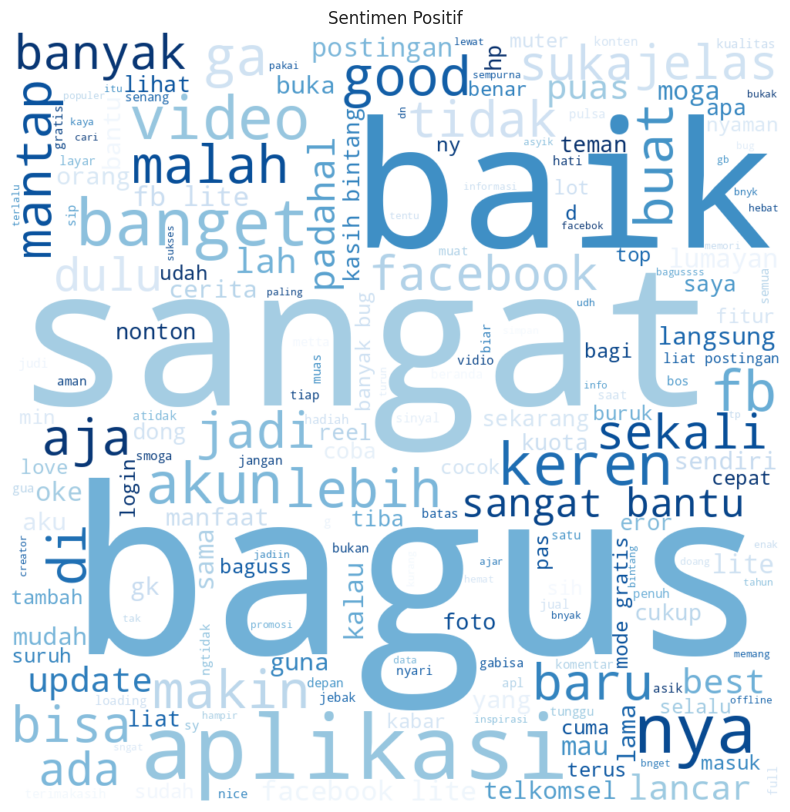

In [47]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data[data['sentimen'] == 0]
data_negatif = data[data['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

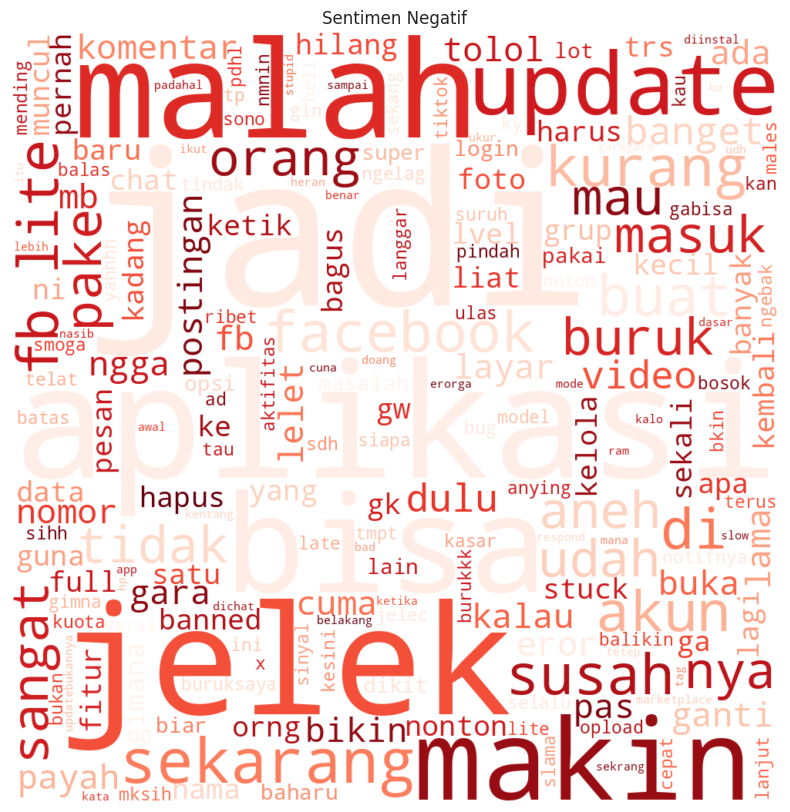

In [48]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

In [49]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
0    341
1     59
Name: count, dtype: int64

# **Data Preparation & Modeling**

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [52]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [53]:
X_train

273                                           sangt bgus
172                                                buruk
23                                 the best banget novel
605                       ga jelas tiba ga beranda hadeh
32                                          sangat bantu
                             ...                        
108                                                bagus
167                                                 puas
458        bagus rahasia tak nampakkan bagus video bagus
606    hari aja bug nyagabisa komenkomen ga nongoljar...
161                                                 baik
Name: content, Length: 280, dtype: object

In [54]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [55]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [56]:
X_train_vec.toarray()

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.2289077, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [57]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.8666666666666667
Akurasi untuk c = 0.05: 0.8666666666666667
Akurasi untuk c = 0.25: 0.8833333333333333
Akurasi untuk c = 0.5: 0.875
Akurasi untuk c = 0.75: 0.875
Akurasi untuk c = 1: 0.8666666666666667


In [58]:
linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [59]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8666666666666667 


In [60]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.87
[[102   2]
 [ 14   2]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       104
           1       0.50      0.12      0.20        16

    accuracy                           0.87       120
   macro avg       0.69      0.55      0.56       120
weighted avg       0.83      0.87      0.83       120



In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives (TN) = ', cm[0, 0])

print('\nTrue Positives (TP) = ', cm[1, 1])

print('\nFalse Negatives (FN) = ', cm[0, 1])

print('\nFalse Positives (FP) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[102   2]
 [ 14   2]]

True Negatives (TN) =  102

True Positives (TP) =  2

False Negatives (FN) =  2

False Positives (FP) =  14

Accuracy =  0.8666666666666667


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

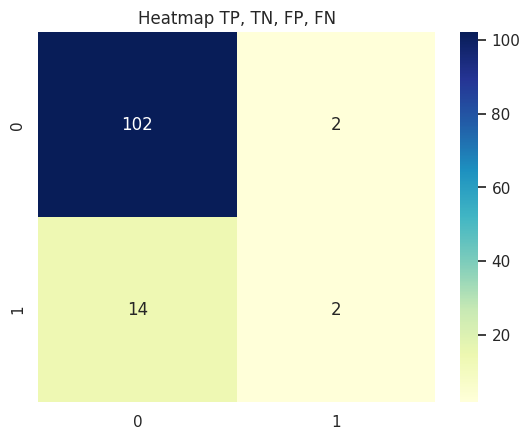

In [62]:
cm_matrix = pd.DataFrame(data=cm, columns=['0' , '1'],
                                 index=['0' , '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [63]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [64]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8667


In [65]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1333


# **Testing**


In [66]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : sangat bagus aplikasinya
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 98.53%
Probabilitas: 98.52943768843116 %


In [68]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : jelek aplikasinya , tolol dan lelet
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 97.62%
Probabilitas: 97.62410329268081 %
